### refer to: https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
import random as rdm

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from utils import load_weights, save_weights, show_image

tf.keras.backend.clear_session()

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('* train and test data loaded, shape is: {}'.format(x_train.shape))

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 输入层，输入 28 点阵图片
    tf.keras.layers.Dropout(0.2),  # dropout 正则化
    tf.keras.layers.Dense(10, activation='softmax')  # 10 单元的 softmax 层作为输出
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_path = 'models/mnist_num_softmax'
if not load_weights(model, model_path=model_path):
    model.fit(x_train, y_train, epochs=5)
    save_weights(model, model_path=model_path)

lost, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('* finish test, lost is {}, accuracy is {}'.format(lost, accuracy))

model.summary()

random_idx = rdm.randint(0, len(x_test))

selected_img = np.array([x_test[random_idx]])
show_image(selected_img)

result_num = np.argmax(model.predict(selected_img)[0])
print('* result number is: {}'.format(result_num))

* train and test data loaded, shape is: (60000, 28, 28)
10000/1 - 0s - loss: 0.1936 - accuracy: 0.9268
* finish test, lost is 0.2708414345532656, accuracy is 0.926800012588501
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


<Figure size 100x100 with 1 Axes>

* result number is: 8


* train and test data loaded, shape is: (60000, 28, 28)
10000/1 - 0s - loss: 0.0410 - accuracy: 0.9760
* finish test, lost is 0.07981035743718967, accuracy is 0.9760000109672546
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


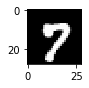

* result number is: 7


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rdm
from utils import load_weights, save_weights, show_image

tf.keras.backend.clear_session()

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('* train and test data loaded, shape is: {}'.format(x_train.shape))

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # 输入层，输入 28 点阵图片
        tf.keras.layers.Dense(128, activation='relu'),  # 128 神经元的全连接层
        tf.keras.layers.Dropout(0.2),  # dropout 正则化
        tf.keras.layers.Dense(10, activation='softmax')  # 10 单元的 softmax 层作为输出
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_path = 'models/mnist_num_dense'
if not load_weights(model, model_path=model_path):
    model.fit(x_train, y_train, epochs=5)
    save_weights(model, model_path=model_path)

lost, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('* finish test, lost is {}, accuracy is {}'.format(lost, accuracy))

model.summary()

random_idx = rdm.randint(0, len(x_test))

selected_img = np.array([x_test[random_idx]])  # select random image from test list
show_image(selected_img)

result_num = np.argmax(model.predict(selected_img)[0])
print('* result number is: {}'.format(result_num))

### refer to: https://www.tensorflow.org/tutorials/keras/classification

* train and test data loaded, shape is: (60000, 28, 28)
10000/1 - 0s - loss: 0.2724 - accuracy: 0.8804
* finish test, lost is 0.3378541542828083, accuracy is 0.8804000020027161
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


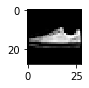

* result is "Sneaker"


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rdm
from utils import load_weights, save_weights, show_image

tf.keras.backend.clear_session()

class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

data = tf.keras.datasets.fashion_mnist
(imgs_train, labels_train), (imgs_test, labels_test) = data.load_data()
imgs_train, imgs_test = imgs_train / 255.0, imgs_test / 255.0
print('* train and test data loaded, shape is: {}'.format(imgs_train.shape))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 输入层，输入 28 点阵图片
    tf.keras.layers.Dense(128, activation='relu'),  # 128 神经元的全连接层
    tf.keras.layers.Dropout(0.2),  # dropout 正则化
    tf.keras.layers.Dense(10, activation='softmax')  # 10 单元的 softmax 层作为输出
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_path = 'models/mnist_fashion_dense'
if not load_weights(model, model_path=model_path):
    model.fit(imgs_train, labels_train, epochs=10)
    save_weights(model, model_path)

lost, accuracy = model.evaluate(imgs_test, labels_test, verbose=2)
print('* finish test, lost is {}, accuracy is {}'.format(lost, accuracy))

model.summary()

random_idx = rdm.randint(0, len(imgs_test))

selected_img = np.array([imgs_test[random_idx]])  # select random image from test list
show_image(selected_img)

result_idx = np.argmax(model.predict(selected_img)[0])
result_cls = class_names[result_idx]
print('* result is "{}"'.format(result_cls))

* train and test data loaded, shape is: (60000, 28, 28, 1)
10000/1 - 4s - loss: 0.1344 - accuracy: 0.9294
* finish test, lost is 0.21741625018417834, accuracy is 0.9294000267982483
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (

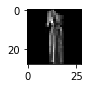

* result is "Dress"


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rdm
from utils import load_weights, save_weights, show_image

tf.keras.backend.clear_session()

class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

data = tf.keras.datasets.fashion_mnist
(imgs_train, labels_train), (imgs_test, labels_test) = data.load_data()
imgs_train, imgs_test = imgs_train / 255.0, imgs_test / 255.0
imgs_train, imgs_test = imgs_train.reshape(-1, 28, 28, 1), imgs_test.reshape(-1, 28, 28, 1)
print('* train and test data loaded, shape is: {}'.format(imgs_train.shape))


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 输入层，输入 28 点阵图片
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # dropout 正则化
    tf.keras.layers.Flatten(),  # 平面化
    tf.keras.layers.Dense(128, activation='relu'),  # 128 神经元的全连接层
    tf.keras.layers.Dropout(0.5),  # dropout 正则化
    tf.keras.layers.Dense(10, activation='softmax')  # 10 单元的 softmax 层作为输出
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_path = 'models/mnist_fashion_cnn'
if not load_weights(model, model_path=model_path):
    model.fit(imgs_train, labels_train, epochs=10)
    save_weights(model, model_path=model_path)

lost, accuracy = model.evaluate(imgs_test, labels_test, verbose=2)
print('* finish test, lost is {}, accuracy is {}'.format(lost, accuracy))

model.summary()

random_idx = rdm.randint(0, len(imgs_test))

selected_img = np.array([imgs_test[random_idx]])  # select random image from test list
show_image(selected_img.reshape(28, 28))

result_idx = np.argmax(model.predict(selected_img)[0])
result_cls = class_names[result_idx]
print('* result is "{}"'.format(result_cls))